# Subduction setup with LaMEM

This is an example that shows how you can generate a 2D subduction setup from julia.
First, we load the required packages:

In [1]:
using LaMEM, GeophysicalModelGenerator, GMT, Plots

[ Info: Precompiling LaMEM [2e889f3d-35ce-4a77-8ea2-858aecb630f7]


Loading GMT routines within GMG
Adding Plots.jl plotting extensions for LaMEM


Create a basic model setup:

In [6]:
model = Model(Grid(nel=(256,1,64), x=[-1500,1500], z=[-660,0], y=[-10,10] ), 
                Scaling(GEO_units(stress=1000MPa, viscosity=1e20Pa*s)),
                 Time(dt=1e-2, dt_min=1e-5, dt_max=1e-1, nstep_out=5, nstep_max=100, time_end=100))

LaMEM Model setup
|
|-- Scaling             :  GeoParams.Units.GeoUnits{GEO}
|-- Grid                :  nel=(256, 1, 64); xϵ(-1500.0, 1500.0), yϵ(-10.0, 10.0), zϵ(-660.0, 0.0) 
|-- Time                :  nstep_max=100; nstep_out=5; time_end=100.0; dt=0.01
|-- Boundary conditions :  noslip=[0, 0, 0, 0, 0, 0]
|-- Solution parameters :  eta_min=1.0e18; eta_max=1.0e25; eta_ref=1.0e20; act_temp_diff=0
|-- Solver options      :  direct solver; superlu_dist; penalty term=10000.0
|-- Model setup options :  Type=files; 
|-- Output options      :  filename=output; pvd=1; avd=0; surf=0
|-- Materials           :  0 phases; 


In [7]:
model.Time

LaMEM Timestepping parameters: 
  time_end        = 100.0 
  dt              = 0.01 
  dt_min          = 1.0e-5 
  dt_max          = 0.1 
  dt_out          = 0.2 
  inc_dt          = 0.1 
  CFL             = 0.5 
  CFLMAX          = 0.8 
  nstep_max       = 100 
  nstep_out       = 5 
  nstep_rdb       = 100 
  nstep_ini       = 1 
  time_tol        = 1.0e-8 


Now let's add a slab in the mix, starting with the horizontal one:

In [8]:
addBox!(model, xlim=(-700,100), zlim=(-60,0), phase=LithosphericPhases(Layers=[20 60], Phases=[1 2 0]), DipAngle=0, T=ConstantTemp(1000))

In [9]:
addBox!(model, xlim=(100,300), zlim=(-60,0), phase=LithosphericPhases(Layers=[20 60], Phases=[1 2 0]), DipAngle=30, T=ConstantTemp(1000))

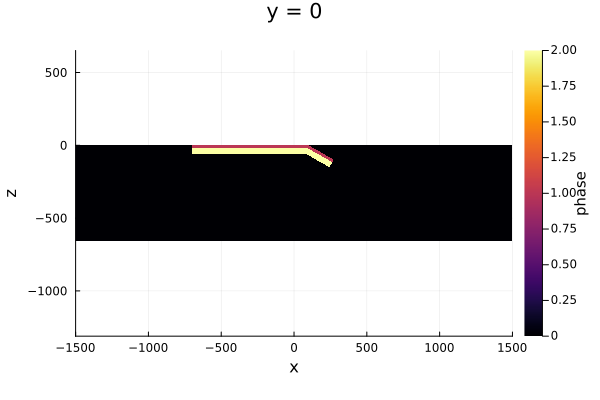

In [21]:
plot_cross_section(model,y=0)

We need to specify material properties:

In [35]:
mantle = Phase(ID=0, Name="Mantle", eta=1e20, rho=3200);
crust  = Phase(ID=1, Name="Crust",  eta=5e22, rho=3300, ch=5e6, fr=5);
slab   = Phase(ID=2, Name="Slab",   eta=5e22, rho=3300);

rm_phase!(model)
add_phase!(model, mantle, slab, crust)
model

LaMEM Model setup
|
|-- Scaling             :  GeoParams.Units.GeoUnits{GEO}
|-- Grid                :  nel=(256, 1, 64); xϵ(-1500.0, 1500.0), yϵ(-10.0, 10.0), zϵ(-660.0, 0.0) 
|-- Time                :  nstep_max=100; nstep_out=5; time_end=100.0; dt=0.01
|-- Boundary conditions :  noslip=[0, 0, 0, 0, 0, 0]
|-- Solution parameters :  eta_min=1.0e18; eta_max=1.0e25; eta_ref=1.0e20; act_temp_diff=0
|-- Solver options      :  direct solver; superlu_dist; penalty term=10000.0
|-- Model setup options :  Type=files; 
|-- Output options      :  filename=output; pvd=1; avd=0; surf=0
|-- Materials           :  3 phases; 


In [36]:
model.Solver.PETSc_options = ["-snes_ksp_ew", "-js_ksp_monitor"]
#model.ModelSetup.advect="rk2";
#model.ModelSetup.interp="stagp";
#model.Output = Output(out_file_name = "Subduction2D_direct", out_j2_dev_stress=1)

2-element Vector{String}:
 "-snes_ksp_ew"
 "-js_ksp_monitor"

In [37]:
run_lamem(model,1)

Saved file: Model3D.vts
Writing LaMEM marker file -> ./markers/mdb.00000000.dat
-------------------------------------------------------------------------- 
                   Lithosphere and Mantle Evolution Model                   
     Compiled: Date: Apr  7 2023 - Time: 22:11:23 	    
     Version : 1.2.4 
-------------------------------------------------------------------------- 
        STAGGERED-GRID FINITE DIFFERENCE CANONICAL IMPLEMENTATION           
-------------------------------------------------------------------------- 
Parsing input file : output.dat 
   Adding PETSc option: -snes_ksp_ew
   Adding PETSc option: -js_ksp_monitor
Finished parsing input file : output.dat 
--------------------------------------------------------------------------
Scaling parameters:
   Temperature : 1000. [C/K] 
   Length      : 1e+06 [m] 
   Viscosity   : 1e+20 [Pa*s] 
   Stress      : 1e+09 [Pa] 
--------------------------------------------------------------------------
Time stepping parame

    1 KSP Residual norm 1.534312253694e-02 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  5 SNES Function norm 1.750201432845e+00 
  5 MMFD   ||F||/||F0||=7.205655e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.706089526613e-02 
    1 KSP Residual norm 8.252603683137e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  6 SNES Function norm 8.799261166800e-01 
  6 MMFD   ||F||/||F0||=3.622694e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 9.107971117450e-03 
    1 KSP Residual norm 4.341702306741e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  7 SNES Function norm 5.408244533081e-01 
  7 MMFD   ||F||/||F0||=2.226598e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.618500340045e-03 
    1 KSP Residual norm 2.352325856661e-03 
    2 KSP Residual norm 2.665386746960e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  8 SNES Function norm 2.107676670295e-01 
----

  3 SNES Function norm 6.246910883854e-01 
  3 PICARD ||F||/||F0||=2.107664e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.011879312259e-02 
    1 KSP Residual norm 9.111117232691e-06 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  4 SNES Function norm 4.109335459257e-01 
  4 PICARD ||F||/||F0||=1.386461e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.019551547527e-02 
    1 KSP Residual norm 4.242025650156e-06 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  5 SNES Function norm 2.695080273637e-01 
  5 MMFD   ||F||/||F0||=9.093014e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 5.228103597688e-03 
    1 KSP Residual norm 6.797186886367e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  6 SNES Function norm 1.119038371802e-01 
  6 MMFD   ||F||/||F0||=3.775558e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.422785141966e-04 
    1 KSP Residual norm 3.509508810477e-

    Residual norms for js_ solve.
    0 KSP Residual norm 1.825285989630e-01 
    1 KSP Residual norm 2.062690139461e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 2.379530285030e+00 
  1 PICARD ||F||/||F0||=5.827523e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 3.539385153735e-02 
    1 KSP Residual norm 2.198361934137e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 1.265469720931e+00 
  2 PICARD ||F||/||F0||=3.099164e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.297932005864e-02 
    1 KSP Residual norm 1.139785169211e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  3 SNES Function norm 6.362997157505e-01 
  3 PICARD ||F||/||F0||=1.558312e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.401450640375e-02 
    1 KSP Residual norm 5.935765858558e-06 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  4 SNES Func

    2 KSP Residual norm 2.890197586929e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  6 SNES Function norm 9.460745112147e-02 
  6 MMFD   ||F||/||F0||=1.091380e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.930434469032e-04 
    1 KSP Residual norm 1.253767405189e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  7 SNES Function norm 1.231537669676e-02 
  7 MMFD   ||F||/||F0||=1.420687e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.253800486554e-04 
    1 KSP Residual norm 5.293230011301e-05 
    2 KSP Residual norm 1.521282435330e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  8 SNES Function norm 3.144767706125e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 8
SNES solution time      : 2.23782 (sec)
--------------------------------------------------------------------------

    Residual norms for js_ solve.
    0 KSP Residual norm 2.330875910436e-01 
    1 KSP Residual norm 2.218171213104e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 8.615757661736e-01 
  1 MMFD   ||F||/||F0||=2.180262e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.826966202413e-02 
    1 KSP Residual norm 4.594950557789e-03 
    2 KSP Residual norm 6.447778524739e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  2 SNES Function norm 1.015724267660e-01 
  2 MMFD   ||F||/||F0||=2.570343e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 8.473059028493e-04 
    1 KSP Residual norm 2.100937754262e-04 
    2 KSP Residual norm 1.322119537030e-04 
    3 KSP Residual norm 2.078638708677e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  3 SNES Function norm 4.881044841156e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|

  3 SNES Function norm 1.604543919588e-01 
  3 MMFD   ||F||/||F0||=1.382114e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 8.094582933091e-04 
    1 KSP Residual norm 2.981695040516e-04 
    2 KSP Residual norm 1.231459150741e-04 
    3 KSP Residual norm 2.795066403357e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  4 SNES Function norm 1.332267438541e-02 
  4 MMFD   ||F||/||F0||=1.147582e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.964538235459e-05 
    1 KSP Residual norm 2.099893514745e-05 
    2 KSP Residual norm 8.432643897609e-06 
    3 KSP Residual norm 2.572781864187e-06 
    4 KSP Residual norm 5.117695534051e-07 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 4
  5 SNES Function norm 1.736717681771e-04 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 5
SNES solution time      : 1.5934 (sec)
-------

    3 KSP Residual norm 4.296869732590e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  3 SNES Function norm 3.097994338477e-01 
  3 MMFD   ||F||/||F0||=7.340590e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.616350024636e-03 
    1 KSP Residual norm 4.219589647986e-04 
    2 KSP Residual norm 1.414713449217e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  4 SNES Function norm 4.209109998775e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 4
SNES solution time      : 1.09931 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 8.084199030686e-09 
      |Div|_2   = 1.788192827218e-08 
   Momentum: 
      |mRes|_2  = 4.209109998774e-02 
--------------------------------------------------------------------------
Actual time step : 0.01807 [

Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 49489 markers and merged 49528 markers in 5.7410e-02 s
--------------------------------------------------------------------------
================================ STEP 22 =================================
--------------------------------------------------------------------------
Current time        : 0.36602956 [Myr] 
Tentative time step : 0.01755603 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 3.551129215779e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.115222406998e-01 
    1 KSP Residual norm 6.755189691473e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 3.625831776759e+00 
  1 PICARD ||F||/||F0||=1.021036e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 5.157151341957e-02 
    1 KSP Residual norm 3.025023550735e-05 
  Linear js_

    Residual norms for js_ solve.
    0 KSP Residual norm 3.910279880424e-01 
    1 KSP Residual norm 2.188039635958e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 4.839338566966e+00 
  1 PICARD ||F||/||F0||=3.258298e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 8.403156680801e-02 
    1 KSP Residual norm 6.239872964217e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 1.249022366943e+00 
  2 MMFD   ||F||/||F0||=8.409594e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 3.214175504332e-02 
    1 KSP Residual norm 6.588797213275e-03 
    2 KSP Residual norm 2.268559409324e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 3.889868113486e-01 
  3 MMFD   ||F||/||F0||=2.619025e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 5.192186898561e-03 
    1 KSP Residual norm 1.079490238604e-03 
    2 KSP Residual norm 8.2948641

    Residual norms for js_ solve.
    0 KSP Residual norm 2.867252382457e-03 
    1 KSP Residual norm 1.377917168424e-03 
    2 KSP Residual norm 5.229055770762e-04 
    3 KSP Residual norm 1.176360932567e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  4 SNES Function norm 7.907770403788e-02 
  4 MMFD   ||F||/||F0||=4.744015e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 3.881361577316e-04 
    1 KSP Residual norm 1.044311531392e-04 
    2 KSP Residual norm 4.333011271555e-05 
    3 KSP Residual norm 1.589449944217e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  5 SNES Function norm 5.653549945477e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 5
SNES solution time      : 1.23016 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 4.1

    3 KSP Residual norm 7.539521926915e-05 
    4 KSP Residual norm 1.605411639875e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 4
  3 SNES Function norm 3.290402899488e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 3
SNES solution time      : 0.781952 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 5.077905968626e-08 
      |Div|_2   = 7.067697617043e-08 
   Momentum: 
      |mRes|_2  = 3.290402898729e-03 
--------------------------------------------------------------------------
Actual time step : 0.01620 [Myr] 
--------------------------------------------------------------------------
Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 61386 markers and merged 61386 markers in 6.0050e-02 s
-----------------------------------------------

Marker control [0]: (subgrid) cloned 63552 markers and merged 63570 markers in 6.0661e-02 s
--------------------------------------------------------------------------
================================ STEP 35 =================================
--------------------------------------------------------------------------
Current time        : 0.58003913 [Myr] 
Tentative time step : 0.01510627 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 3.259820911077e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.897200088163e-01 
    1 KSP Residual norm 2.096505933655e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 3.946484574654e+00 
  1 PICARD ||F||/||F0||=1.210645e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.558183145369e-02 
    1 KSP Residual norm 5.686472489178e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterati

Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 64774 markers and merged 64732 markers in 6.1600e-02 s
--------------------------------------------------------------------------
================================ STEP 38 =================================
--------------------------------------------------------------------------
Current time        : 0.62307143 [Myr] 
Tentative time step : 0.01449740 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 3.236867474259e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.162007647567e-01 
    1 KSP Residual norm 3.730015572773e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 2.645417654726e+00 
  1 MMFD   ||F||/||F0||=8.172771e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.813044681689e-02 
    1 KSP Residual norm 4.721443098137e-03 
    2 KSP Re

    2 KSP Residual norm 3.478737736802e-04 
    3 KSP Residual norm 1.092993880840e-04 
    4 KSP Residual norm 3.941837653516e-05 
    5 KSP Residual norm 1.931183076456e-05 
    6 KSP Residual norm 1.014667771379e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 6
  3 SNES Function norm 5.812062312273e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 3
SNES solution time      : 0.907717 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 1.861718094444e-08 
      |Div|_2   = 3.039615954799e-08 
   Momentum: 
      |mRes|_2  = 5.812062312272e-02 
--------------------------------------------------------------------------
Actual time step : 0.01482 [Myr] 
--------------------------------------------------------------------------
Performing marker control (subgrid algorithm)
Marker 

    Residual norms for js_ solve.
    0 KSP Residual norm 2.252404684361e-03 
    1 KSP Residual norm 5.698170088760e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  6 SNES Function norm 1.369814336025e-01 
  6 MMFD   ||F||/||F0||=2.735030e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.189681837260e-04 
    1 KSP Residual norm 3.548871552317e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  7 SNES Function norm 4.641821898181e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 7
SNES solution time      : 1.61178 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 1.079301725770e-08 
      |Div|_2   = 2.885387248182e-08 
   Momentum: 
      |mRes|_2  = 4.641821898180e-02 
---------------------------------------------------------------------

Marker control [0]: (subgrid) cloned 68706 markers and merged 68691 markers in 6.8488e-02 s
--------------------------------------------------------------------------
================================ STEP 48 =================================
--------------------------------------------------------------------------
Current time        : 0.76491770 [Myr] 
Tentative time step : 0.01326104 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 4.734605378255e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.291900209487e-01 
    1 KSP Residual norm 4.138675359722e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 5.112308837937e+00 
  1 PICARD ||F||/||F0||=1.079775e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.041235531697e-02 
    1 KSP Residual norm 6.253423184094e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterati

Saving output ... done (0.008698 sec)
--------------------------------------------------------------------------
================================ STEP 51 =================================
--------------------------------------------------------------------------
Current time        : 0.80351123 [Myr] 
Tentative time step : 0.01251845 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 2.662947017469e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.372541103014e-01 
    1 KSP Residual norm 1.070483994012e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 2.351375952351e+00 
  1 MMFD   ||F||/||F0||=8.829976e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.945437900896e-02 
    1 KSP Residual norm 5.289304529410e-03 
    2 KSP Residual norm 1.364402511515e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  2 

    Residual norms for js_ solve.
    0 KSP Residual norm 1.101549272161e-03 
    1 KSP Residual norm 4.639722460615e-04 
    2 KSP Residual norm 2.060327265490e-04 
    3 KSP Residual norm 1.065035418554e-04 
    4 KSP Residual norm 3.534285473096e-05 
    5 KSP Residual norm 9.776633150892e-06 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 5
  4 SNES Function norm 3.073030125182e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 4
SNES solution time      : 1.05665 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 4.579854920306e-08 
      |Div|_2   = 9.251022322495e-08 
   Momentum: 
      |mRes|_2  = 3.073030123790e-03 
--------------------------------------------------------------------------
Actual time step : 0.01202 [Myr] 
---------------------------------------------------

    Residual norms for js_ solve.
    0 KSP Residual norm 6.009758122381e-01 
    1 KSP Residual norm 1.908987550907e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 9.821015778312e+00 
  1 PICARD ||F||/||F0||=2.580666e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.569003362103e-01 
    1 KSP Residual norm 1.815244226629e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 3.153085387427e+00 
  2 MMFD   ||F||/||F0||=8.285354e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.265741086909e-01 
    1 KSP Residual norm 3.660914453691e-02 
    2 KSP Residual norm 3.637466366478e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 5.608171724405e-01 
  3 MMFD   ||F||/||F0||=1.473658e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.179909521585e-02 
    1 KSP Residual norm 3.616359531641e-03 
    2 KSP Residual norm 7.5585293

Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 70509 markers and merged 70518 markers in 7.1822e-02 s
--------------------------------------------------------------------------
================================ STEP 62 =================================
--------------------------------------------------------------------------
Current time        : 0.93470339 [Myr] 
Tentative time step : 0.01106893 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 6.247677055418e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.652135335189e-01 
    1 KSP Residual norm 7.514797169661e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 1.104436116360e+01 
  1 PICARD ||F||/||F0||=1.767755e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.141488452805e-02 
    1 KSP Residual norm 3.635333566734e-05 
  Linear js_

    1 KSP Residual norm 1.315457011591e-02 
    2 KSP Residual norm 5.149695011265e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  2 SNES Function norm 2.034301257167e+00 
  2 MMFD   ||F||/||F0||=2.027263e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.351099899314e-03 
    1 KSP Residual norm 3.348169660931e-03 
    2 KSP Residual norm 1.102853547057e-03 
    3 KSP Residual norm 1.783247891454e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  3 SNES Function norm 7.522961750798e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 3
SNES solution time      : 0.80225 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 3.971730817842e-08 
      |Div|_2   = 7.283501078279e-08 
   Momentum: 
      |mRes|_2  = 7.522961750794e-02 
---------------

Marker control [0]: (subgrid) cloned 70084 markers and merged 70015 markers in 7.2274e-02 s
--------------------------------------------------------------------------
================================ STEP 69 =================================
--------------------------------------------------------------------------
Current time        : 1.01281936 [Myr] 
Tentative time step : 0.01045651 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 7.134541958554e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 8.199850058434e-01 
    1 KSP Residual norm 2.714180806231e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 1.250085823265e+01 
  1 PICARD ||F||/||F0||=1.752160e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 6.231632391274e-02 
    1 KSP Residual norm 4.073744580575e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterati

    1 KSP Residual norm 3.992672845687e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 4.220778412145e+00 
  2 MMFD   ||F||/||F0||=5.808610e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.577661799903e-02 
    1 KSP Residual norm 1.345519723657e-02 
    2 KSP Residual norm 4.354471140643e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 8.192644093302e-01 
  3 MMFD   ||F||/||F0||=1.127467e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.247529963970e-02 
    1 KSP Residual norm 1.859678186869e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  4 SNES Function norm 1.408579893736e-01 
  4 MMFD   ||F||/||F0||=1.938479e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.854046875042e-03 
    1 KSP Residual norm 1.407477919260e-03 
    2 KSP Residual norm 3.196642215619e-04 
    3 KSP Residual norm 7.029137843113e-05 
  Linear js_ solve conv

Marker control [0]: (subgrid) cloned 70991 markers and merged 71057 markers in 7.8996e-02 s
--------------------------------------------------------------------------
Saving output ... done (0.009009 sec)
--------------------------------------------------------------------------
================================ STEP 76 =================================
--------------------------------------------------------------------------
Current time        : 1.08663997 [Myr] 
Tentative time step : 0.01069253 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 7.311392502428e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 7.597752816595e-01 
    1 KSP Residual norm 5.486555490511e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 1.148784506301e+01 
  1 PICARD ||F||/||F0||=1.571225e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 5.5192504

  2 SNES Function norm 2.006699593410e+00 
  2 MMFD   ||F||/||F0||=4.262095e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.018416888698e-02 
    1 KSP Residual norm 5.610726991089e-03 
    2 KSP Residual norm 9.924968917255e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 2.831834172685e-01 
  3 MMFD   ||F||/||F0||=6.014626e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.309172457239e-03 
    1 KSP Residual norm 4.076915348232e-04 
    2 KSP Residual norm 1.361145049107e-04 
    3 KSP Residual norm 5.639121375828e-05 
    4 KSP Residual norm 1.315653096382e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 4
  4 SNES Function norm 3.590534764865e-03 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 4
SNES solution time      : 0.99437 (sec)
--------------------------------------------------

  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  5 SNES Function norm 3.097118651811e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 5
SNES solution time      : 1.28821 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 1.431853625944e-08 
      |Div|_2   = 3.046253586201e-08 
   Momentum: 
      |mRes|_2  = 3.097118651809e-02 
--------------------------------------------------------------------------
Actual time step : 0.01040 [Myr] 
--------------------------------------------------------------------------
Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 71325 markers and merged 71349 markers in 7.3382e-02 s
--------------------------------------------------------------------------
================================ STEP 83 ====================

  0 SNES Function norm 5.545564910030e+02 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 9.973482701979e-01 
    1 KSP Residual norm 1.454178712898e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 1.494749917823e+01 
  1 PICARD ||F||/||F0||=2.695397e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.223421960812e-01 
    1 KSP Residual norm 8.525934414574e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 3.110032288398e+00 
  2 MMFD   ||F||/||F0||=5.608143e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 3.429039383298e-02 
    1 KSP Residual norm 8.363856030819e-03 
    2 KSP Residual norm 2.105416235474e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 1.129986326301e+00 
  3 MMFD   ||F||/||F0||=2.037640e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 5.930987608960e-

    Residual norms for js_ solve.
    0 KSP Residual norm 1.066337647403e-02 
    1 KSP Residual norm 4.260727091062e-03 
    2 KSP Residual norm 1.102070489325e-03 
    3 KSP Residual norm 4.345417813942e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  3 SNES Function norm 3.103076039265e-01 
  3 MMFD   ||F||/||F0||=6.089388e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 1.117919356156e-03 
    1 KSP Residual norm 4.561377491234e-04 
    2 KSP Residual norm 3.564172650451e-04 
    3 KSP Residual norm 1.054618036550e-04 
    4 KSP Residual norm 4.328641796130e-05 
    5 KSP Residual norm 8.114746795971e-06 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 5
  4 SNES Function norm 1.741881861293e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 4
SNES solution time      : 1.1254 (sec)
--------------------------------------------

Marker control [0]: (subgrid) cloned 70006 markers and merged 70087 markers in 7.1836e-02 s
--------------------------------------------------------------------------
================================ STEP 93 =================================
--------------------------------------------------------------------------
Current time        : 1.25877739 [Myr] 
Tentative time step : 0.00952444 [Myr] 
--------------------------------------------------------------------------
  0 SNES Function norm 1.137309188745e+03 
  0 PICARD ||F||/||F0||=1.000000e+00 
    Residual norms for js_ solve.
    0 KSP Residual norm 9.373211081406e-01 
    1 KSP Residual norm 3.350576467021e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  1 SNES Function norm 1.349966026999e+01 
  1 PICARD ||F||/||F0||=1.186982e-02 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.841144396448e-02 
    1 KSP Residual norm 3.263272459436e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterati

    Residual norms for js_ solve.
    0 KSP Residual norm 1.074078412903e-01 
    1 KSP Residual norm 9.519896079150e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 1
  2 SNES Function norm 6.755375339702e+00 
  2 MMFD   ||F||/||F0||=6.613627e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 2.600590283848e-02 
    1 KSP Residual norm 9.072746192803e-03 
    2 KSP Residual norm 2.564985508366e-03 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  3 SNES Function norm 2.302943290697e+00 
  3 MMFD   ||F||/||F0||=2.254621e-03 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.156062008304e-03 
    1 KSP Residual norm 9.385106158271e-04 
    2 KSP Residual norm 3.720741589259e-04 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 2
  4 SNES Function norm 1.868211824593e-01 
  4 MMFD   ||F||/||F0||=1.829011e-04 
    Residual norms for js_ solve.
    0 KSP Residual norm 4.188290829648e-04 
    1 KSP Residual norm 2.0508685

    2 KSP Residual norm 1.655724830182e-04 
    3 KSP Residual norm 4.806768394602e-05 
  Linear js_ solve converged due to CONVERGED_RTOL iterations 3
  4 SNES Function norm 1.334347941596e-02 
--------------------------------------------------------------------------
SNES Convergence Reason : ||F|| < rtol*||F_initial|| 
Number of iterations    : 4
SNES solution time      : 1.02205 (sec)
--------------------------------------------------------------------------
Residual summary: 
   Continuity: 
      |Div|_inf = 2.227907490437e-09 
      |Div|_2   = 6.605144310693e-09 
   Momentum: 
      |mRes|_2  = 1.334347941596e-02 
--------------------------------------------------------------------------
Actual time step : 0.00878 [Myr] 
--------------------------------------------------------------------------
Performing marker control (subgrid algorithm)
Marker control [0]: (subgrid) cloned 67241 markers and merged 67235 markers in 7.3511e-02 s
------------------------------------------------

In [38]:
timesteps,_,_ = Read_LaMEM_simulation(model)

([0, 1, 5, 10, 15, 20, 25, 30, 35, 40  …  55, 60, 65, 70, 75, 80, 85, 90, 95, 100], ["Timestep_00000000_0.00000000e+00/output.pvtr", "Timestep_00000001_1.10000000e-02/output.pvtr", "Timestep_00000005_6.71561000e-02/output.pvtr", "Timestep_00000010_1.66581857e-01/output.pvtr", "Timestep_00000015_2.57828650e-01/output.pvtr", "Timestep_00000020_3.48473537e-01/output.pvtr", "Timestep_00000025_4.33857195e-01/output.pvtr", "Timestep_00000030_5.17186714e-01/output.pvtr", "Timestep_00000035_5.94592017e-01/output.pvtr", "Timestep_00000040_6.66640879e-01/output.pvtr"  …  "Timestep_00000055_8.64809596e-01/output.pvtr", "Timestep_00000060_9.23634466e-01/output.pvtr", "Timestep_00000065_9.79787338e-01/output.pvtr", "Timestep_00000070_1.03378089e+00/output.pvtr", "Timestep_00000075_1.08663997e+00/output.pvtr", "Timestep_00000080_1.13848347e+00/output.pvtr", "Timestep_00000085_1.18968292e+00/output.pvtr", "Timestep_00000090_1.23963520e+00/output.pvtr", "Timestep_00000095_1.28669612e+00/output.pvtr", 

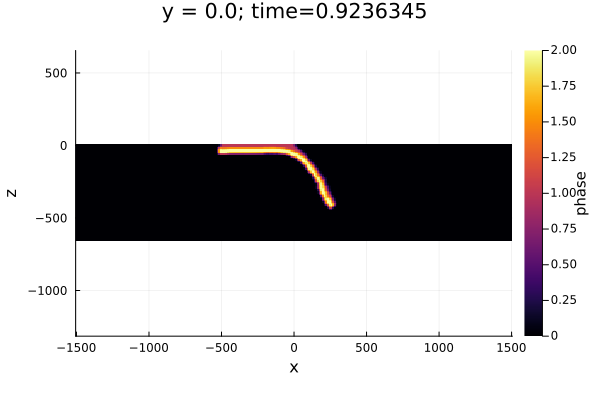

In [41]:
plot_cross_section(model, y=0.0, timestep=60, field=:phase, dim=3)	